##What is Computer Price prediction ?
What should be the price for a computer?

When you purchase a new computer, you estimate its price based on its specifications like the Hard Drive, RAM, screen size etc.



##Data description !
The business meaning of each column in the data is as below:
* Price : The Price of the computer
* SpeedGHz : The speed of processor in Gigahertz
* HDisk : How much hard disk space is present
* RAM : How much ram is present in the computer
* Screen : The screen size
* Branded : Branded computer or not
* Gaming : Gaming computer or not
* MultiCore : Multicore or not

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
import pandas as pd
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/ComputerPrice.csv")
df

,Price,SpeedGHz,HDisk,RAM,Screen,Branded,Gaming,MultiCore
0,14990,25,80,4,14,no,no,yes
1,17950,33,85,2,14,no,no,yes
2,15950,25,170,4,15,no,no,yes
3,18490,25,170,8,14,no,no,no
4,32950,33,340,16,14,no,no,yes
...,...,...,...,...,...,...,...,...
6254,16900,100,528,8,15,no,no,yes
6255,22230,66,850,16,15,yes,yes,yes
6256,26540,100,1200,24,15,yes,no,yes
6257,21950,100,850,16,15,yes,no,yes


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      6259 non-null   int64 
 1   SpeedGHz   6259 non-null   int64 
 2   HDisk      6259 non-null   int64 
 3   RAM        6259 non-null   int64 
 4   Screen     6259 non-null   int64 
 5   Branded    6259 non-null   object
 6   Gaming     6259 non-null   object
 7   MultiCore  6259 non-null   object
dtypes: int64(5), object(3)
memory usage: 391.3+ KB


In [148]:
df.describe()

,Price,SpeedGHz,HDisk,RAM,Screen
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,22195.766097,52.011024,416.601694,8.286947,14.608723
std,5808.039557,21.157735,258.548445,5.631099,0.905115
min,9490.000000,25.000000,80.000000,2.000000,14.000000
25%,17940.000000,33.000000,214.000000,4.000000,14.000000
50%,21440.000000,50.000000,340.000000,8.000000,14.000000
75%,25950.000000,66.000000,528.000000,8.000000,15.000000
max,53990.000000,100.000000,2100.000000,32.000000,17.000000


In [149]:
df.duplicated().sum()

2667

In [150]:
df.isna().sum()

Price        0
SpeedGHz     0
HDisk        0
RAM          0
Screen       0
Branded      0
Gaming       0
MultiCore    0
dtype: int64

In [151]:
df.columns

Index(['Price', 'SpeedGHz', 'HDisk', 'RAM', 'Screen', 'Branded', 'Gaming',
       'MultiCore'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split
y=df['Price']
x=df[['SpeedGHz', 'HDisk', 'RAM', 'Screen', 'Branded', 'Gaming',
       'MultiCore']]

In [153]:
x['Branded']=x['Branded'].replace({'yes':1,'no':0})
x['Gaming']=x['Gaming'].replace({'yes':1,'no':0})
x['MultiCore']=x['MultiCore'].replace({'yes':1,'no':0})
x

,SpeedGHz,HDisk,RAM,Screen,Branded,Gaming,MultiCore
0,25,80,4,14,0,0,1
1,33,85,2,14,0,0,1
2,25,170,4,15,0,0,1
3,25,170,8,14,0,0,0
4,33,340,16,14,0,0,1
...,...,...,...,...,...,...,...
6254,100,528,8,15,0,0,1
6255,66,850,16,15,1,1,1
6256,100,1200,24,15,1,0,1
6257,100,850,16,15,1,0,1


<Axes: ylabel='SpeedGHz'>

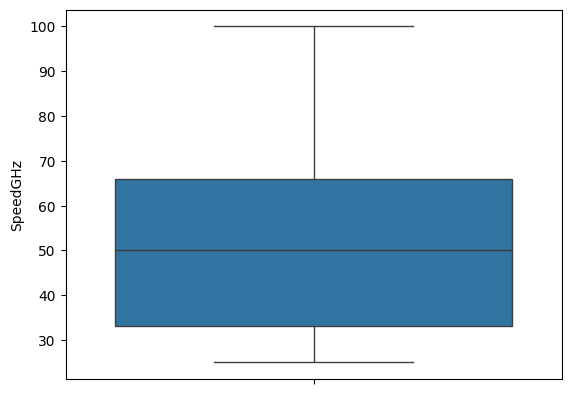

In [154]:
import seaborn as sns
sns.boxplot(df['SpeedGHz'])

<Axes: ylabel='HDisk'>

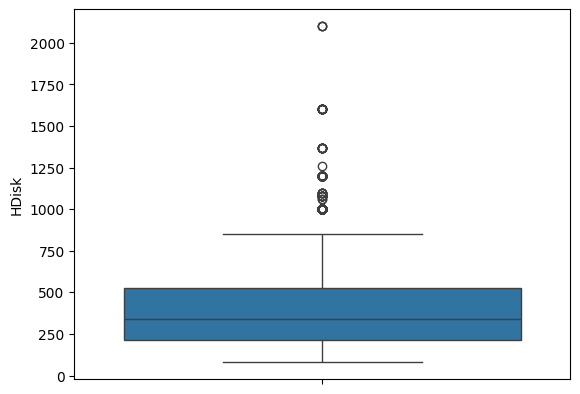

In [155]:
sns.boxplot(df['HDisk'])

<Axes: xlabel='HDisk', ylabel='Density'>

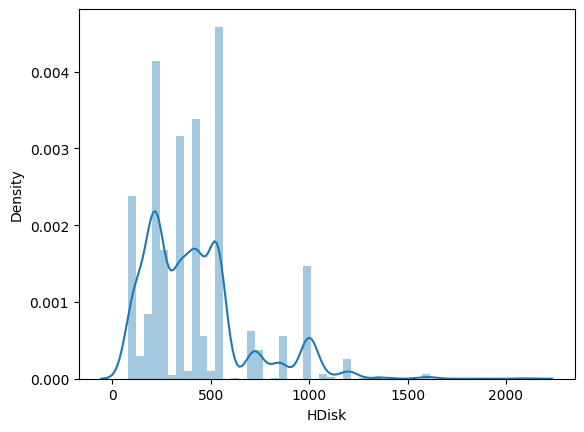

In [156]:
sns.distplot(df['HDisk'])

<Axes: ylabel='HDisk'>

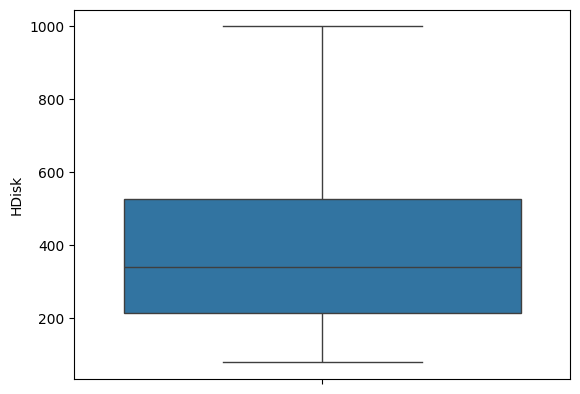

In [157]:
q1=df['HDisk'].quantile(0.25)
q3=df['HDisk'].quantile(0.75)
iqr=q3-q1
min=q1-1.5*iqr
max=q3+1.5*iqr
df['HDisk']=df['HDisk'].clip(min,max)
sns.boxplot(df['HDisk'])

<Axes: ylabel='RAM'>

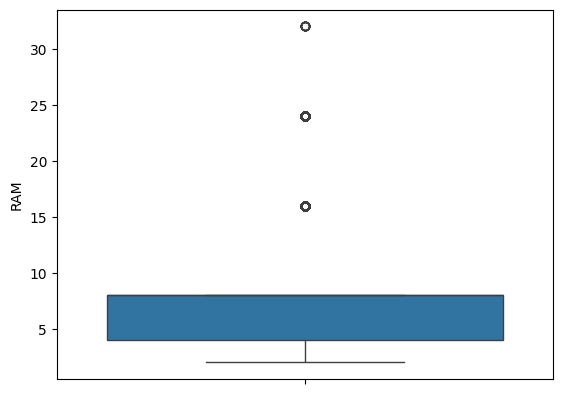

In [158]:
sns.boxplot(df['RAM'])

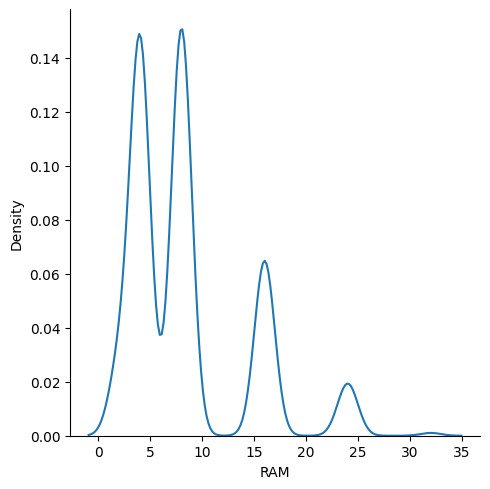

In [159]:
sns.displot(df['RAM'],kind='kde')

<Axes: ylabel='RAM'>

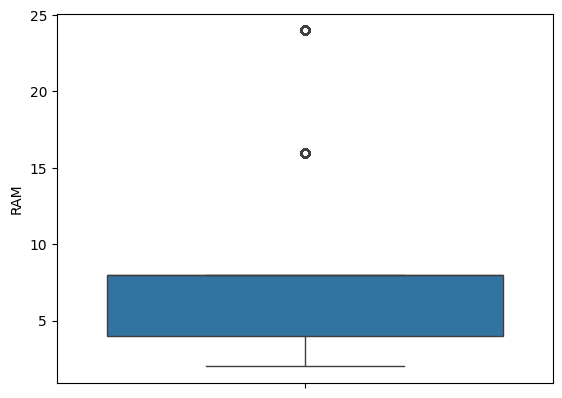

In [160]:
min_ram=df['RAM'].quantile(0.01)
max_ram=df['RAM'].quantile(0.99)
df['RAM']=df['RAM'].clip(min_ram,max_ram)
sns.boxplot(df['RAM'])

In [161]:
print(df['RAM'].min(),df['RAM'].max())

2 24


##Exploratory Data Analsis (EDA) Model

In [162]:
import statsmodels.api as sm
model=sm.OLS(y,x)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          2.714e+04
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                        0.00
Time:                        13:00:29   Log-Likelihood:                         -60941.
No. Observations:                6259   AIC:                                  1.219e+05
Df Residuals:                    6252   BIC:                                  1.219e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###According to EDA Model, the 'Gaming' column does not have any significance on predicting the price of computer.


In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [164]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression(fit_intercept=False)

In [165]:
model1.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [166]:
y_pred=model1.predict(x_test)

In [167]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

3110.693820869166

###R2 score = 50% before removing 'Gaming' column.

In [168]:
r2_score(y_test,y_pred)

0.5042369617282776

In [169]:
x.drop('Gaming',axis=1,inplace=True)

##Exploratory Data Analysis (EDA) model after removing 'Gaming' column.

In [170]:
import statsmodels.api as sm
model=sm.OLS(y,x)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          3.167e+04
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                        0.00
Time:                        13:00:29   Log-Likelihood:                         -60941.
No. Observations:                6259   AIC:                                  1.219e+05
Df Residuals:                    6253   BIC:                                  1.219e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###According to above EDA model, there is no irrelevant feature variable in the model.

In [171]:
from sklearn.model_selection import train_test_split
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(x,y,random_state=2529)

In [172]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False)

In [173]:
model.fit(new_x_train,new_y_train)

LinearRegression(fit_intercept=False)

In [174]:
new_y_pred=model.predict(new_x_test)

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(new_y_test,new_y_pred)

3111.0111694704665

###R2 score= 50% after removing 'Gaming' column is same as before removing it.

In [176]:
r2_score(new_y_test,new_y_pred)

0.5043036662928612

##Since, r2 score = 50% means, all the feature variables are only able to explain 50% of the target variable of the model.
##Hence, there are some more feature variables required for better predictive model.